In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [101]:
#os.listdir()
os.chdir("preprocessed_data")

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'preprocessed_data'

In [108]:
df = pd.read_csv(r'DataSUS_For_ML.csv', sep=';', encoding='UTF-8', usecols=None)
df.shape

(784435, 44)

In [109]:
var1 = 'Detectable'
df = df.query('PCR_Result == @var1')
df.shape

(474493, 44)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474493 entries, 0 to 784434
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Notification_Date        474493 non-null  object 
 1   First_Symptom_Date       474493 non-null  object 
 2   State                    474493 non-null  object 
 3   Gender                   474493 non-null  object 
 4   Pregnancy                474493 non-null  object 
 5   Race                     474493 non-null  object 
 6   Schooling                474493 non-null  object 
 7   Fever                    474493 non-null  object 
 8   Cough                    474493 non-null  object 
 9   Sore_Throat              474493 non-null  object 
 10  Dyspnea                  474493 non-null  object 
 11  Respiratory_Discomfort   474493 non-null  object 
 12  Saturation               474493 non-null  object 
 13  Diarrhea                 474493 non-null  object 
 14  Vomi

# Dropping Dates

In [111]:
df.drop('Notification_Date', axis=1, inplace=True)
df.drop('First_Symptom_Date', axis=1, inplace=True)
df.drop('Admission_Date', axis=1, inplace=True)
df.drop('Intubation_Date', axis=1, inplace=True)
df.drop('PCR_Date', axis=1, inplace=True)
df.drop('Evolution_Date', axis=1, inplace=True)
df.drop('Hospital_Discharge_Date', axis=1, inplace=True)
df.drop('Sample_Date', axis=1, inplace=True)

# Dropping from Analytics conclusions

In [112]:
df.drop('State', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Race', axis=1, inplace=True)
df.drop('Schooling', axis=1, inplace=True)
df.drop('Postpartum', axis=1, inplace=True)
df.drop('Pregnancy', axis=1, inplace=True)
df.drop('Vaccine', axis=1, inplace=True)
df.drop('Outbreak_Count', axis=1, inplace=True)
df.drop('PCR_Result', axis=1, inplace=True)

# Labeling and Scoreing Categories

In [113]:
from sklearn import preprocessing

In [114]:
def correction(v):
    if v == '1':
        return 1
    elif v == '0':
        return 0
    else:
        return 0

In [115]:
'''def vent_sup(v):
    if v == '2':
        return 2
    elif v == '1':
        return 1
    elif v == '0':
        return 0
    else:
        return 0'''

"def vent_sup(v):\n    if v == '2':\n        return 2\n    elif v == '1':\n        return 1\n    elif v == '0':\n        return 0\n    else:\n        return 0"

In [116]:
def result(v):
    if v == 'Detectable':
        return 1
    elif v == 'Not Detectable':
        return 0

In [117]:
def evo(v):
    if v == 'Death':
        return 1
    elif v == 'Cure':
        return 0

In [118]:
selected_columns = ['Fever', 'Cough', 'Sore_Throat', 'Dyspnea', 'Respiratory_Discomfort', 'Saturation', 'Diarrhea', 
                    'Vomiting', 'Other_Symptoms', 'Risk_Factors', 'Heart_Disease', 'Hematology', 'Down_Syndrome',
                    'Liver_Disease', 'Asthma', 'Diabetes', 'Neuropathies', 'Lung_Disease', 'Immunosuppression',
                    'Kidney_Disease', 'Obesity', 'ICU', 'Ventilatory_Support']

In [119]:
for v in selected_columns:
    df[v] = list(map(correction, df[v]))

In [120]:
#df['Ventilatory_Support'] = list(map(vent_sup, df['Ventilatory_Support']))

In [121]:
#df['PCR_Result'] = list(map(result, df['PCR_Result']))

In [122]:
df['Evolution'] = list(map(evo, df['Evolution']))

# Correlations with Evolution

In [123]:
df.corr()['Evolution'].sort_values(ascending=False)*100

Evolution                 100.000000
Ventilatory_Support        42.238378
Age                        36.621837
ICU                        31.430032
Saturation                 14.846041
Heart_Disease              13.635061
Diabetes                   12.199216
Respiratory_Discomfort     11.423717
Kidney_Disease             10.528477
Dyspnea                    10.341046
Neuropathies               10.209158
Lung_Disease                8.561605
Immunosuppression           5.249102
Liver_Disease               4.048319
TimeDelta_PCR               3.786393
Hematology                  2.407703
Obesity                     1.721576
Down_Syndrome               0.545904
Asthma                     -2.224371
Vomiting                   -2.865341
Outbreak_Period            -2.954809
Diarrhea                   -5.591601
Sore_Throat                -6.264691
Fever                      -6.823852
Cough                      -8.366515
Other_Symptoms             -9.835952
Risk_Factors                     NaN
N

In [124]:
#df.drop('Age', axis=1, inplace=True)
df.drop('Asthma', axis=1, inplace=True)
#df.drop('Cough', axis=1, inplace=True)
df.drop('Diabetes', axis=1, inplace=True)
df.drop('Diarrhea', axis=1, inplace=True)
df.drop('Down_Syndrome', axis=1, inplace=True)
#df.drop('Dyspnea', axis=1, inplace=True)
#df.drop('Fever', axis=1, inplace=True)
#df.drop('Heart_Disease', axis=1, inplace=True)
df.drop('Hematology', axis=1, inplace=True)
df.drop('Immunosuppression', axis=1, inplace=True)
df.drop('Kidney_Disease', axis=1, inplace=True)
#df.drop('Liver_Disease', axis=1, inplace=True)
#df.drop('Lung_Disease', axis=1, inplace=True)
df.drop('Neuropathies', axis=1, inplace=True)
df.drop('Obesity', axis=1, inplace=True)
df.drop('Other_Symptoms', axis=1, inplace=True)
df.drop('Outbreak_Period', axis=1, inplace=True)
df.drop('Respiratory_Discomfort', axis=1, inplace=True)
df.drop('Risk_Factors', axis=1, inplace=True)
#df.drop('Saturation', axis=1, inplace=True)
df.drop('Sore_Throat', axis=1, inplace=True)
df.drop('TimeDelta_PCR', axis=1, inplace=True)
df.drop('Vomiting', axis=1, inplace=True)

In [125]:
df['Evolution'].value_counts()

0    316628
1    157865
Name: Evolution, dtype: int64

In [126]:
(316628-157865)/(316628+157865)

0.33459503090667303

In [127]:
from imblearn.over_sampling import SMOTE

y = df['Evolution']
X = df.drop('Evolution', axis=1)

#X_sm = X
#y_sm = y

smote = SMOTE(sampling_strategy='minority') # not majority
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    316628
1    316628
Name: Evolution, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
%%capture
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

In [131]:
# obtain predicted probabilities for each class
y_prob = logistic.predict_proba(X_test)

# set a new threshold for the probability of the positive class
new_threshold = 0.5

# classify instances based on the new threshold
y_pred = (y_prob[:, 1] >= new_threshold).astype(int)

logistic.score(X_train, y_train)

print(logistic.intercept_)
print(logistic.coef_)

feature_name = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(logistic.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', logistic.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

[-3.92046038]
[[-0.09095557 -0.29635057  0.2472382   0.18836909 -0.05264258  0.13036959
   0.09536353  0.61965811  2.02410933  0.05241617]]


,Feature name,Coefficient
0,Intercept,-3.920460
1,Fever,-0.090956
2,Cough,-0.296351
3,Dyspnea,0.247238
4,Saturation,0.188369
5,Heart_Disease,-0.052643
6,Liver_Disease,0.130370
7,Lung_Disease,0.095364
8,ICU,0.619658
9,Ventilatory_Support,2.024109


In [132]:
import math

def calculate_odds_ratio(coff):
    return math.exp(coff)

summary_table['Odd Ratio'] = summary_table['Coefficient'].apply(calculate_odds_ratio)
summary_table

,Feature name,Coefficient,Odd Ratio
0,Intercept,-3.920460,0.019832
1,Fever,-0.090956,0.913058
2,Cough,-0.296351,0.743527
3,Dyspnea,0.247238,1.280484
4,Saturation,0.188369,1.207279
5,Heart_Disease,-0.052643,0.948719
6,Liver_Disease,0.130370,1.139249
7,Lung_Disease,0.095364,1.100059
8,ICU,0.619658,1.858293
9,Ventilatory_Support,2.024109,7.569366


In [133]:
from sklearn.metrics import accuracy_score

In [134]:
from sklearn.metrics import confusion_matrix

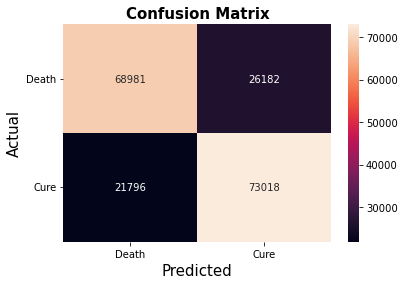

In [135]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Death", "Cure"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [37]:
accuracy_score(y_test, y_pred)

0.7460060954747154

In [137]:
precision_score(y_test, y_pred, labels = [1,0])

0.7598951276204325

In [138]:
recall_score(y_test, y_pred, labels = [1,0])

0.7248720616205878

In [139]:
f1_score(y_test, y_pred, average='macro')

0.7473395477751612

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     94814
           1       0.76      0.72      0.74     95163

    accuracy                           0.75    189977
   macro avg       0.75      0.75      0.75    189977
weighted avg       0.75      0.75      0.75    189977



In [141]:
predict_proba = logistic.predict_proba(X_test)

lista = []
for i, pred in enumerate(predict_proba):
    lista.append(predict_proba[i][1])

In [142]:
df_ = pd.DataFrame()

df_['Age'] = X_test['Age']
df_['Result Predicted'] = y_pred
df_['Result of Evolution'] = y_test
df_['predict_proba'] = lista
df_

,Age,Result Predicted,Result of Evolution,predict_proba
590875,79.0,1,1,0.736614
372298,44.0,0,1,0.351711
604715,76.0,1,1,0.564087
162113,91.0,1,1,0.710479
218492,49.0,0,1,0.205532
...,...,...,...,...
247034,75.0,1,0,0.641366
367780,79.0,1,0,0.600797
11944,64.0,0,1,0.478454
416503,51.0,0,0,0.199839


In [143]:
df_['predict_proba'].describe()

count    189977.000000
mean          0.499954
std           0.278237
min           0.012612
25%           0.260781
50%           0.479174
75%           0.731559
max           0.986556
Name: predict_proba, dtype: float64

In [144]:
var1 = 0.10
var2 = 0.85
df_ = df_.query('predict_proba <= @var1 or predict_proba >= @var2')
df_

,Age,Result Predicted,Result of Evolution,predict_proba
179961,72.0,1,1,0.930920
317358,17.0,0,0,0.040332
620548,89.0,1,1,0.851599
378290,52.0,1,1,0.882355
129387,68.0,1,1,0.938383
...,...,...,...,...
11343,19.0,0,1,0.053340
559733,77.0,1,1,0.957058
317369,81.0,1,1,0.950953
515475,71.0,1,1,0.886708


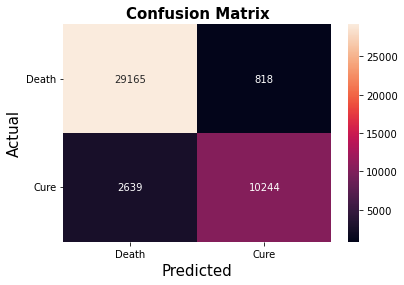

In [145]:
cm = confusion_matrix(df_['Result of Evolution'], df_['Result Predicted'], labels = [1,0])
labels = ["Death", "Cure"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [146]:
accuracy_score(df_['Result of Evolution'], df_['Result Predicted'])

0.9193533336443802

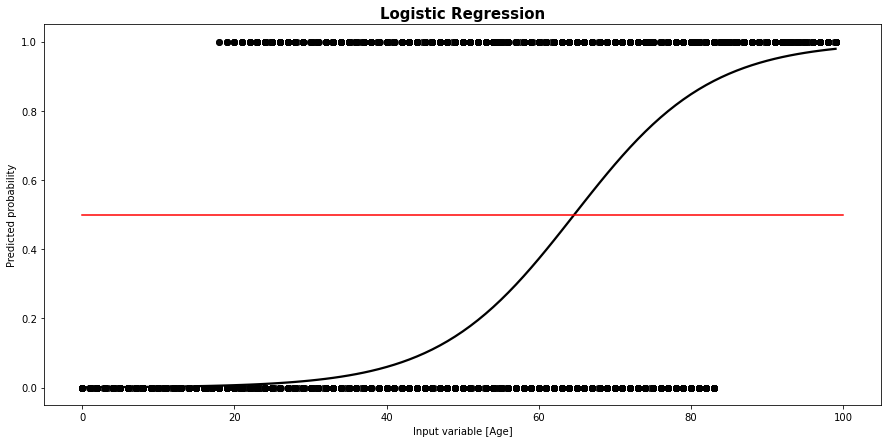

In [147]:
plt.figure(figsize = (15,7))
sns.regplot(x=X_test['Age'], y=y_pred, data=df, logistic=True, ci=None, color='k')

# ploting the threshold
x1, y1 = [0, 100], [0.5, 0.5]
plt.plot(x1, y1, 'r')

plt.title('Logistic Regression', fontsize = 15, fontweight = 'bold')
plt.xlabel('Input variable [Age]', fontsize = 10)
plt.ylabel('Predicted probability', fontsize = 10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# Decision Tree

In [148]:
from sklearn import preprocessing

In [149]:
'''A decision tree is a type of supervised learning algorithm that is used for classification and regression tasks.
The DecisionTreeClassifier class in sklearn.tree is a popular implementation of the decision tree algorithm in Python.

Once you have trained a DecisionTreeClassifier model, you can visualize the decision tree using the plot_tree function 
in sklearn.tree. This will display a graphical representation of the decision tree,
which can be used to interpret how the model is making its predictions.

To interpret a decision tree, start at the root node and follow the path through the tree based on the values of the 
features in your data. At each node, the model makes a decision based on a feature and a threshold value. 
If the value of the feature is less than or equal to the threshold, the model follows the left branch of the tree.
If the value of the feature is greater than the threshold, the model follows the right branch of the tree.

At the leaf nodes of the tree, the model assigns a class label or a numerical value depending on the type of problem 
you are trying to solve. For example, if you are trying to predict whether an email is spam or not, the leaf nodes might
be labeled as "spam" or "not spam".

It is also important to note that decision trees are prone to overfitting, 
which means that they can learn to memorize the training data instead of generalizing to new, unseen data.
To avoid overfitting, you can use techniques such as pruning, setting maximum depth or minimum number of samples per leaf,
and using ensemble methods like random forests.

--------------------------------------------------------------------

criterion: This parameter specifies the function to measure the quality of a split.
The default value is 'gini', which uses the Gini impurity to measure the quality of a split.
Alternatively, you can set it to 'entropy', which uses the information gain to measure the quality of a split.

random_state: This parameter sets the random seed used by the random number generator.
This is useful for reproducibility, as it ensures that the same results are obtained each 
time the code is run with the same input data.

splitter: This parameter specifies the strategy used to choose the split at each node.
The default value is 'best', which chooses the best split based on the criterion specified.
Alternatively, you can set it to 'random', which chooses the best random split.

ccp_alpha: This parameter is used for pruning the decision tree. 
It specifies the complexity parameter used for Minimal Cost-Complexity Pruning (MCCP).
The default value is 0.0, which means no pruning is performed.
Increasing the value of ccp_alpha leads to more aggressive pruning, which can help prevent overfitting of the model.'''

'A decision tree is a type of supervised learning algorithm that is used for classification and regression tasks.\nThe DecisionTreeClassifier class in sklearn.tree is a popular implementation of the decision tree algorithm in Python.\n\nOnce you have trained a DecisionTreeClassifier model, you can visualize the decision tree using the plot_tree function \nin sklearn.tree. This will display a graphical representation of the decision tree,\nwhich can be used to interpret how the model is making its predictions.\n\nTo interpret a decision tree, start at the root node and follow the path through the tree based on the values of the \nfeatures in your data. At each node, the model makes a decision based on a feature and a threshold value. \nIf the value of the feature is less than or equal to the threshold, the model follows the left branch of the tree.\nIf the value of the feature is greater than the threshold, the model follows the right branch of the tree.\n\nAt the leaf nodes of the tree

In [150]:
X_sm.isnull().sum()

Fever                  0
Cough                  0
Dyspnea                0
Saturation             0
Heart_Disease          0
Liver_Disease          0
Lung_Disease           0
ICU                    0
Ventilatory_Support    0
Age                    0
dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion = 'gini', random_state=None, splitter = 'best',
                             min_samples_split = 2, max_features=None, min_samples_leaf = 5000,
                             max_depth = 4, max_leaf_nodes = None, ccp_alpha=0.001)

In [153]:
X_train.columns

Index(['Fever', 'Cough', 'Dyspnea', 'Saturation', 'Heart_Disease',
       'Liver_Disease', 'Lung_Disease', 'ICU', 'Ventilatory_Support', 'Age'],
      dtype='object')

In [154]:
clf = clf.fit(X_train, y_train)

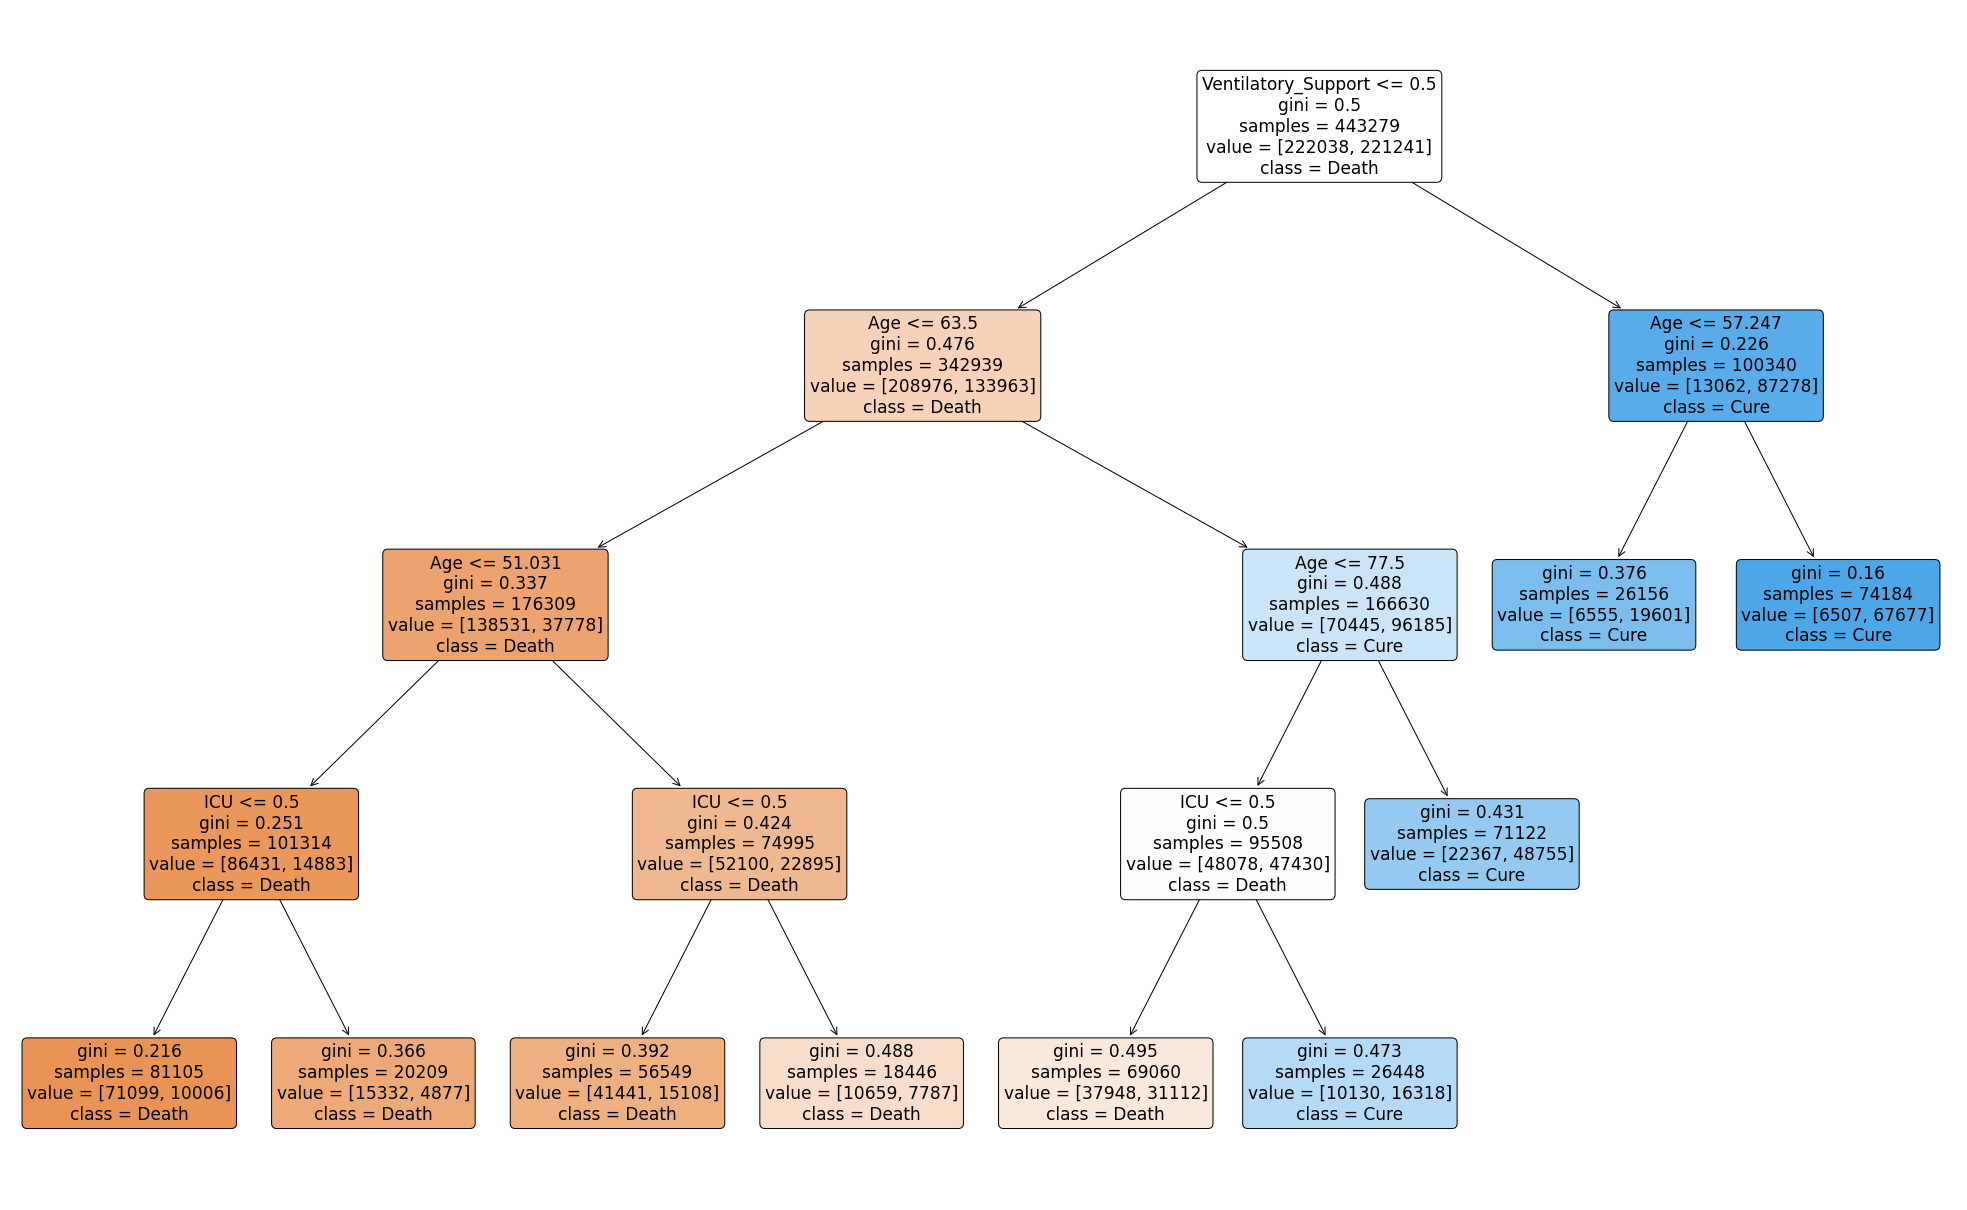

In [155]:
plt.figure(figsize=[35,22])
tree = tree.plot_tree(clf, filled = True, rounded = True, class_names = ["Death", "Cure"], feature_names = X.columns)

In [156]:
importances = clf.feature_importances_
feature_names = X.columns
important_features = [(feature_names[i], importances[i]) for i in range(len(importances)) if importances[i] > 0]

print("Important features:")
for feature, importance in important_features:
    print(f"{feature}: {importance:.2%}")

Important features:
ICU: 3.28%
Ventilatory_Support: 53.61%
Age: 43.11%


In [159]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7417266300657448


In [160]:
y_pred = clf.predict(X_test)

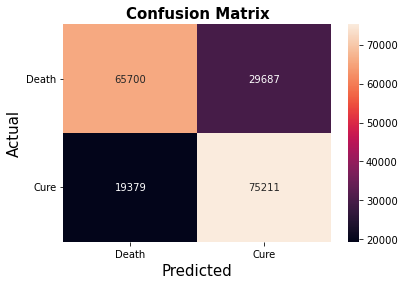

In [161]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Death", "Cure"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [163]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, labels = [1,0]))
print(recall_score(y_test, y_pred, labels = [1,0]))
print(f1_score(y_test, y_pred, average='macro'))

0.7417266300657448
0.7722234628991879
0.6887731032530638
0.741077667234135


In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.75     94590
           1       0.77      0.69      0.73     95387

    accuracy                           0.74    189977
   macro avg       0.74      0.74      0.74    189977
weighted avg       0.74      0.74      0.74    189977



In [165]:
path = clf.cost_complexity_pruning_path(X_train, y_train) # determine value for alpha
ccp_alphas = path.ccp_alphas # extract diferent values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini', random_state=1, splitter = 'best', max_depth = 10, max_leaf_nodes = None, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clf_dts.append(clf)

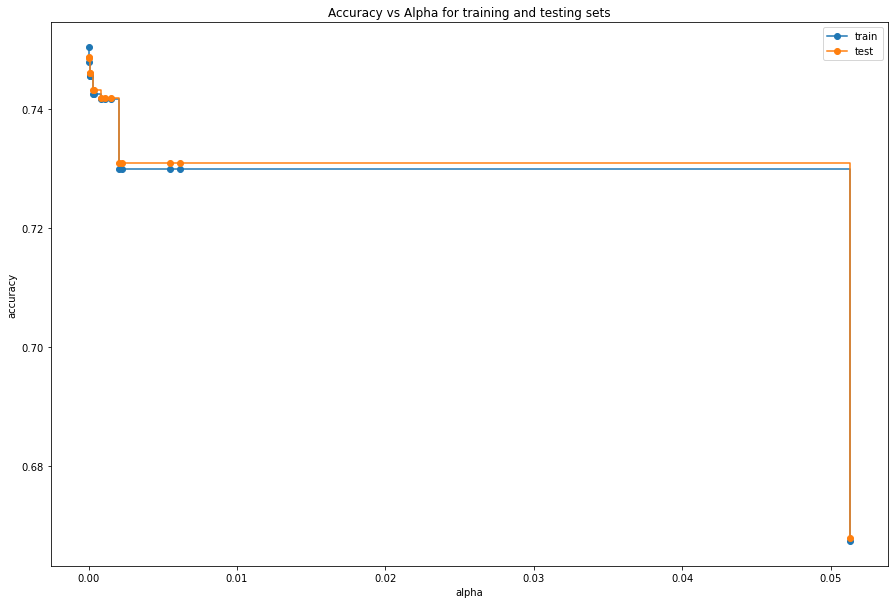

In [80]:
train_scores = [clf.score(X_train, y_train) for clf in clf_dts]
test_scores = [clf.score(X_test, y_test) for clf in clf_dts]

fig, ax = plt.subplots(figsize=[15,10]) 
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
%%capture
forest = RandomForestClassifier(n_estimators = 100,criterion = 'gini', random_state=1, 
                                max_depth = 10, max_leaf_nodes = 10, ccp_alpha=0.0001) # padrão = 100 arvores
forest.fit(X_train, y_train)

In [168]:
y_pred = forest.predict(X_test)

In [169]:
accuracy_score(y_test, y_pred)

0.7432110202814025

In [170]:
# Get the list of important attributes
importances = clf.feature_importances_
feature_names = df.columns
important_features = [(feature_names[i], importances[i]) for i in range(len(importances)) if importances[i] > 0]

# Print the list of important attributes
print("Important features:")
for feature, importance in important_features:
    print(f"{feature}: {importance}")

Important features:
Ventilatory_Support: 0.6123110820103269
Evolution: 0.3876889179896731


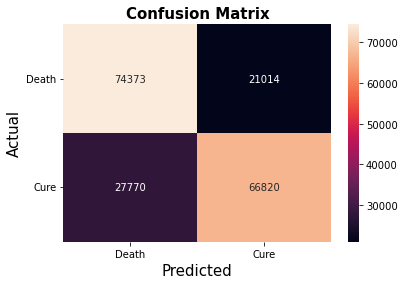

In [171]:
cm = confusion_matrix(y_test, y_pred, labels = [1,0])
labels = ["Death", "Cure"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
#sns.heatmap(cm, annot=True,  xticklabels = ["Detected", "Not Detected"], yticklabels = ["Detected", "Not Detected"])


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [172]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, labels = [1,0]))
print(recall_score(y_test, y_pred, labels = [1,0]))
print(f1_score(y_test, y_pred, average='macro'))

0.7432110202814025
0.728126254368875
0.7796974430477948
0.7428044830612855


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     95193
           1       0.72      0.79      0.75     94784

    accuracy                           0.74    189977
   macro avg       0.75      0.74      0.74    189977
weighted avg       0.75      0.74      0.74    189977



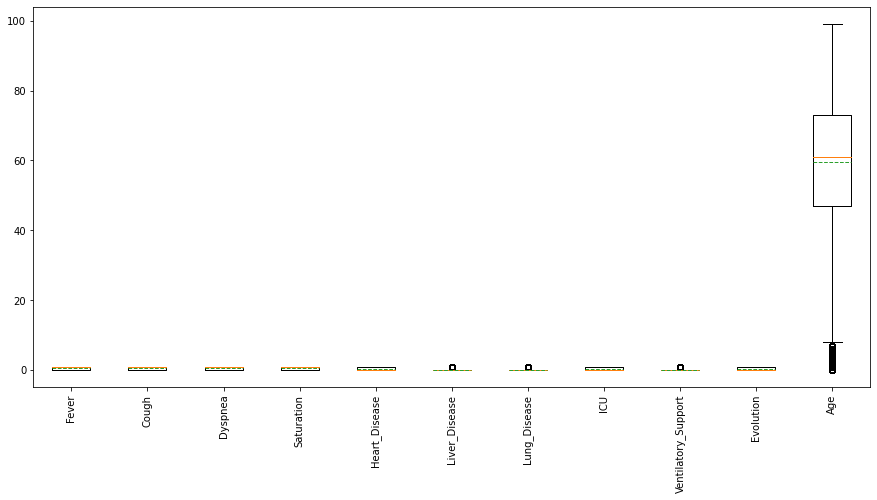

In [88]:
plt.figure(figsize=(15, 7))
plt.boxplot(df, showmeans= True, labels=df.columns.values, meanline=True, vert = True)
plt.xticks(rotation=90)
plt.show()

In [89]:
df_standardized = df.copy() # Creating a DF to be trasformed

In [90]:
lista_atributos = df.columns.values

for atributo in lista_atributos:
    lista_val = []
    maximo = np.max(abs(df_standardized[atributo]))
    for valor in df_standardized[atributo]:
        if maximo == 0:
            lista_val.append(0)
        else:
            lista_val.append(valor / maximo)
    
    df_standardized[atributo] = lista_val
    pd.DataFrame(df_standardized)

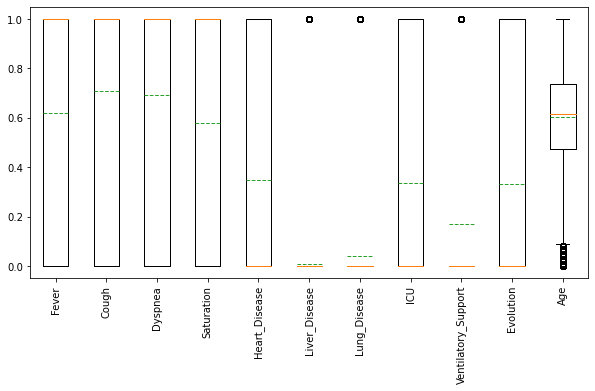

In [91]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_standardized, showmeans= True, labels=df.columns.values, meanline=True, vert = True)
plt.xticks(rotation=90)
plt.show()

In [92]:
df_standardized['Evolution'].value_counts()

0.0    316628
1.0    157865
Name: Evolution, dtype: int64

In [93]:
y = df_standardized['Evolution']
X = df_standardized.drop('Evolution', axis=1)

smote = SMOTE(sampling_strategy='minority') # not majority
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0.0    316628
1.0    316628
Name: Evolution, dtype: int64

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [182]:
import tensorflow as tf

In [183]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 10, activation='sigmoid', input_shape=(10,)))
rede_neural.add(tf.keras.layers.Dense(units = 5, activation = 'sigmoid'))
#rede_neural.add(tf.keras.layers.Dense(units = 3, activation = 'sigmoid'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [184]:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [185]:
rede_neural.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [186]:
rede_neural.fit(X_train, y_train, epochs=5)

Epoch 1/5
13853/13853 [==============================] - 28s 2ms/step - loss: 0.5313 - accuracy: 0.7365
Epoch 2/5
13853/13853 [==============================] - 29s 2ms/step - loss: 0.5158 - accuracy: 0.7453
Epoch 3/5
13853/13853 [==============================] - 29s 2ms/step - loss: 0.5147 - accuracy: 0.7455
Epoch 4/5
13853/13853 [==============================] - 30s 2ms/step - loss: 0.5141 - accuracy: 0.7458
Epoch 5/5
13853/13853 [==============================] - 29s 2ms/step - loss: 0.5138 - accuracy: 0.7461


In [187]:
y_pred = rede_neural.predict(X_test)
y_pred = (y_pred >= 0.5)

5937/5937 [==============================] - 8s 1ms/step


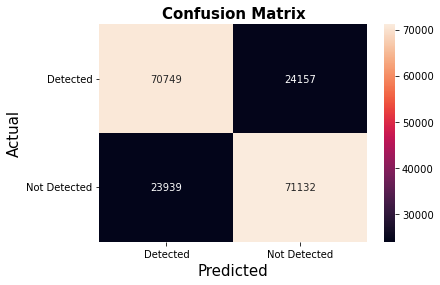

In [188]:
cm = confusion_matrix(y_test, y_pred)
labels = ["Detected", "Not Detected"]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)


plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [189]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, labels = [1,0]))
print(recall_score(y_test, y_pred, labels = [1,0]))
print(f1_score(y_test, y_pred, average='macro'))

0.746832511304
0.7464870026970585
0.7481987146448443
0.7468314823281165


In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     94906
           1       0.75      0.75      0.75     95071

    accuracy                           0.75    189977
   macro avg       0.75      0.75      0.75    189977
weighted avg       0.75      0.75      0.75    189977

